# Asian Growth Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import math

In [2]:
data =pd.read_csv("South_Asian_dataset new.csv")

In [3]:
data.head(10)

,Country,Year,GDP (current US$),GDP growth (annual %),GDP per capita (current US$),"Unemployment, total (% of total labor force) (modeled ILO estimate)","Population, total",Population growth (annual %),"Life expectancy at birth, total (years)","Mortality rate, infant (per 1,000 live births)"
0,Afghanistan,2000,3521418060,0,1.801.883.694,7.955,19542982,1.443.803.024,55.298,92.0
1,Bhutan,2000,460733418.4,3.355.068.305,7.846.184.027,1.652,587207,2.800.570.184,62.010,58.4
2,Bangladesh,2000,53369787319,5.293.294.719,4.131.001.853,3.270,129193327,1.905.524.049,65.779,63.0
3,India,2000,"4,68E+16",3.840.991.157,4.420.353.304,7.856,1059633675,1.822.184.002,62.669,66.4
4,Maldives,2000,624337145.3,3.845.810.232,2.209.988.231,1.970,282507,1.568.301.447,70.876,31.8
5,Sri Lanka,2000,16330814180,6.000.033.158,8.697.534.886,7.740,18776371,565.924.638,70.355,14.4
6,Nepal,2000,5494252208,6.199.999.982,2.237.118.919,10.622,24559500,1.709.775.886,62.614,58.5
7,Pakistan,2000,99484802345,4.260.088.011,644.457.157,597.000,154369924,3.075.552.912,62.102,84.8
8,Afghanistan,2001,2813571754,-9.431.974.068,1.429.033.644,7.958,19688632,742.516.834,55.798,89.3
9,Bhutan,2001,496110225.7,7.328.374.452,8.224.175.456,1.900,603234,2.692.778.294,63.444,55.6


### Dataset Column Descriptions

- **Country**: The name of the country for the data entry.
- **Year**: The year corresponding to the recorded data.
- **GDP (current US$)**: The Gross Domestic Product in current US dollars.
- **GDP growth (annual %)**: The annual percentage growth rate of GDP.
- **GDP per capita (current US$)**: GDP per person in current US dollars.
- **Unemployment, total (% of total labor force) (modeled ILO estimate)**: The percentage of the total labor force that is unemployed.
- **Population, total**: The total population of the country.
- **Population growth (annual %)**: The annual percentage growth rate of the population.
- **Life expectancy at birth, total (years)**: The average number of years a newborn is expected to live.
- **Mortality rate, infant (per 1,000 live births)**: The number of infant deaths per 1,000 live births.


### Data Preprocessing


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 10 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Country                                                              192 non-null    object 
 1   Year                                                                 192 non-null    int64  
 2   GDP (current US$)                                                    192 non-null    object 
 3   GDP growth (annual %)                                                192 non-null    object 
 4   GDP per capita (current US$)                                         192 non-null    object 
 5   Unemployment, total (% of total labor force) (modeled ILO estimate)  192 non-null    float64
 6   Population, total                                                    192 non-null    int64  
 7   Populati

#### Some changing required in data sets beacuse our data has object data type of integer data values one other bug in data is value use . for thousand seperators we repalce it also ###

In [5]:
# Columns to clean
columns_to_clean = [
    'GDP (current US$)', 
    'GDP growth (annual %)', 
    'GDP per capita (current US$)', 
    'Population growth (annual %)'
]

# Replace thousand separators and convert to numeric
for column in columns_to_clean:
    data[column] = (
        data[column]
        .astype(str)  # Ensure all values are strings
        .str.replace('.', '', regex=False)  # Remove thousand separators
        .str.replace(',', '.', regex=False)  # Replace commas with decimal points
    )
    data[column] = pd.to_numeric(data[column], errors='coerce')  # Convert to numeric, handle errors

# Verify the changes
print(data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 10 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Country                                                              192 non-null    object 
 1   Year                                                                 192 non-null    int64  
 2   GDP (current US$)                                                    192 non-null    float64
 3   GDP growth (annual %)                                                192 non-null    int64  
 4   GDP per capita (current US$)                                         192 non-null    int64  
 5   Unemployment, total (% of total labor force) (modeled ILO estimate)  192 non-null    float64
 6   Population, total                                                    192 non-null    int64  
 7   Populati

In [6]:
data.shape

(192, 10)

In [7]:
data.isnull().sum()

Country                                                                0
Year                                                                   0
GDP (current US$)                                                      0
GDP growth (annual %)                                                  0
GDP per capita (current US$)                                           0
Unemployment, total (% of total labor force) (modeled ILO estimate)    0
Population, total                                                      0
Population growth (annual %)                                           0
Life expectancy at birth, total (years)                                0
Mortality rate, infant (per 1,000 live births)                         0
dtype: int64

In [8]:
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


### Exploratory Data Analysis

In [9]:
data.describe()


,Year,GDP (current US$),GDP growth (annual %),GDP per capita (current US$),"Unemployment, total (% of total labor force) (modeled ILO estimate)","Population, total",Population growth (annual %),"Life expectancy at birth, total (years)","Mortality rate, infant (per 1,000 live births)"
count,192.000000,1.920000e+02,1.920000e+02,1.920000e+02,192.000000,1.920000e+02,1.920000e+02,192.000000,192.000000
mean,2011.500000,2.446184e+16,3.869867e+09,3.443967e+09,42.402281,2.110938e+08,1.548760e+09,65.526589,37.486979
std,6.940284,6.524942e+16,3.489491e+09,2.730589e+09,140.901783,4.053449e+08,1.217226e+09,14.680334,23.319156
min,2000.000000,0.000000e+00,-9.431974e+09,0.000000e+00,1.652000,2.825070e+05,-5.294765e+08,0.000000,0.000000
25%,2005.750000,6.039921e+09,1.447547e+09,1.264975e+09,4.312000,1.427913e+07,7.494416e+08,64.067500,18.200000
50%,2011.500000,2.862570e+10,4.426997e+09,2.656332e+09,7.003000,2.742371e+07,1.241347e+09,67.336000,35.400000
75%,2017.250000,1.360000e+16,6.525080e+09,4.799878e+09,9.655250,1.670127e+08,2.118507e+09,71.445500,55.000000
max,2023.000000,3.550000e+17,9.689592e+09,9.935034e+09,796.000000,1.428628e+09,7.541019e+09,80.839000,92.000000


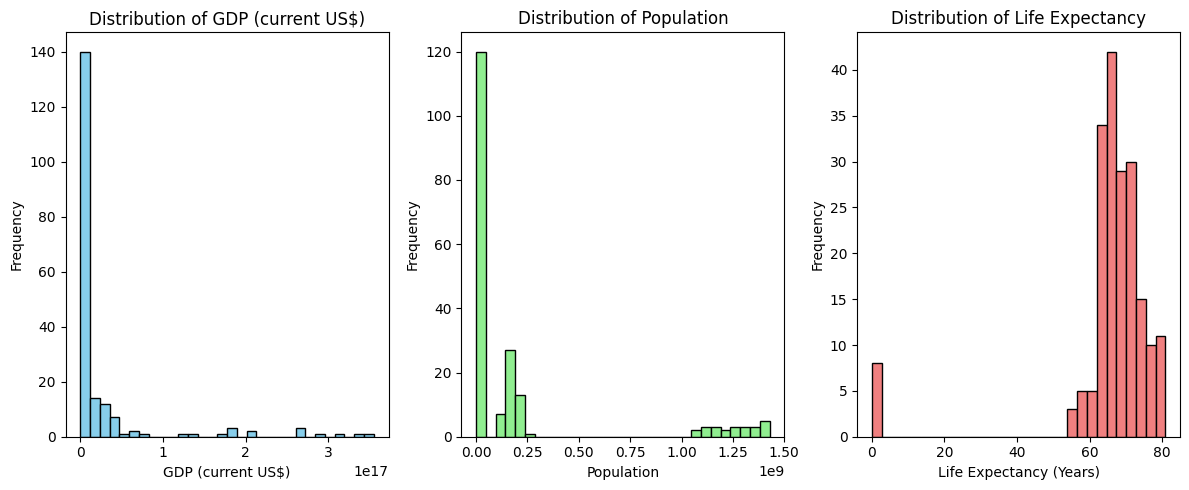

In [10]:
# Plot histograms for key columns
plt.figure(figsize=(12, 5))

# Histogram for GDP
plt.subplot(1, 3, 1)
plt.hist(data['GDP (current US$)'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of GDP (current US$)')
plt.xlabel('GDP (current US$)')
plt.ylabel('Frequency')

# Histogram for Population
plt.subplot(1, 3, 2)
plt.hist(data['Population, total'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Population')
plt.xlabel('Population')
plt.ylabel('Frequency')

# Histogram for Life Expectancy
plt.subplot(1, 3, 3)
plt.hist(data['Life expectancy at birth, total (years)'], bins=30, color='lightcoral', edgecolor='black')
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy (Years)')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()


The Graph contain three sub-histogram graphs. The first shows the distribution of GDP across countries, heavily skewed towards lower values. The second shows the distribution of population, also skewed towards lower values. The third shows the distribution of life expectancy, which is roughly bell-shaped with most countries having a life expectancy between 70-80 years.

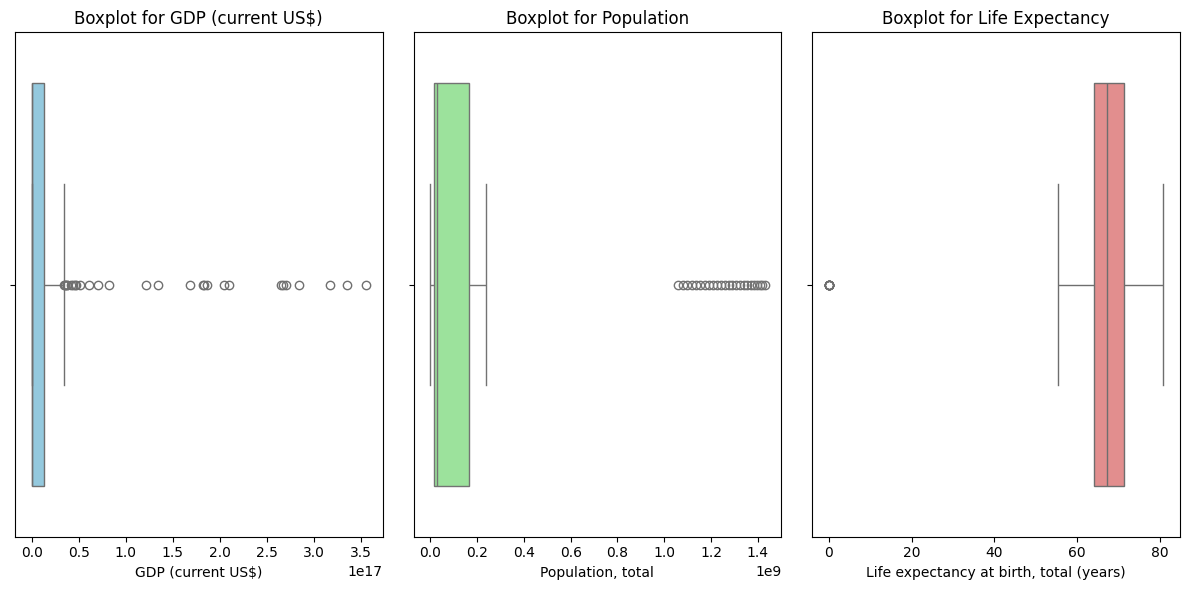

In [11]:
# Plot boxplots for key columns
plt.figure(figsize=(12, 6))

# Boxplot for GDP
plt.subplot(1, 3, 1)
sns.boxplot(x=data['GDP (current US$)'], color='skyblue')
plt.title('Boxplot for GDP (current US$)')

# Boxplot for Population
plt.subplot(1, 3, 2)
sns.boxplot(x=data['Population, total'], color='lightgreen')
plt.title('Boxplot for Population')

# Boxplot for Life Expectancy
plt.subplot(1, 3, 3)
sns.boxplot(x=data['Life expectancy at birth, total (years)'], color='lightcoral')
plt.title('Boxplot for Life Expectancy')

# Show the plots
plt.tight_layout()
plt.show()


The boxplots reveal significant disparities in GDP and population across countries, with most nations falling in the lower ranges. This highlights global economic inequality. In contrast, life expectancy shows a more even distribution, suggesting progress in global health. However, disparities persist and require further attention

In [12]:
# Select relevant columns for correlation analysis
correlation_columns = [    'GDP (current US$)', 
    'GDP per capita (current US$)', 
    'Population, total', 
    'Population growth (annual %)', 
    'Life expectancy at birth, total (years)', 
    'Unemployment, total (% of total labor force) (modeled ILO estimate)', 
    'Mortality rate, infant (per 1,000 live births)']

# Calculate the correlation matrix
correlation_matrix = data[correlation_columns].corr()
'''Correlation ek value hoti hai jo -1 se 1 ke beech hoti hai:
1 means that "perfect positive correlation" (jab ek value badhti hai, doosri bhi badhti hai).
-1 means that "perfect negative correlation" (jab ek value badhti hai, doosri girti hai).
0 means that "no correlation" (donon values ka koi relation nahi hai).'''
correlation_matrix



,GDP (current US$),GDP per capita (current US$),"Population, total",Population growth (annual %),"Life expectancy at birth, total (years)","Unemployment, total (% of total labor force) (modeled ILO estimate)","Mortality rate, infant (per 1,000 live births)"
GDP (current US$),1.000000,-0.197967,0.844701,-0.178071,-0.090812,-0.051463,-0.027682
GDP per capita (current US$),-0.197967,1.000000,-0.150081,0.139116,0.176776,0.081491,-0.048501
"Population, total",0.844701,-0.150081,1.000000,-0.185960,-0.056400,-0.019774,0.138927
Population growth (annual %),-0.178071,0.139116,-0.185960,1.000000,0.021261,0.133655,0.315055
"Life expectancy at birth, total (years)",-0.090812,0.176776,-0.056400,0.021261,1.000000,-0.039292,0.004726
"Unemployment, total (% of total labor force) (modeled ILO estimate)",-0.051463,0.081491,-0.019774,0.133655,-0.039292,1.000000,0.425804
"Mortality rate, infant (per 1,000 live births)",-0.027682,-0.048501,0.138927,0.315055,0.004726,0.425804,1.000000


**Positive Relationships:**
GDP per capita and Life Expectancy: (A moderate positive correlation (0.176776) suggests that countries with higher GDP per capita tend to have higher life expectancies.)
Population Growth and Infant Mortality Rate: (A strong positive correlation (0.315055) indicates that countries with higher population growth rates generally have higher infant mortality rates.)
Unemployment and Infant Mortality Rate: (A moderate positive correlation (0.425804) suggests that higher unemployment rates are associated with higher infant mortality rates.)

**Negative Relationships:**
GDP and GDP per capita:(A moderate negative correlation (-0.197967) exists. Larger economies often have larger populations, which can lower the GDP per capita.)
(Population, total and GDP per capita: A moderate negative correlation (-0.150081) indicates that larger populations tend to have lower GDP per capita.)
Population Growth and GDP: (A moderate negative correlation (-0.178071) suggests that higher population growth may be associated with slower economic growth.)

**Negligible or No Strong Correlation:**
(GDP and Life Expectancy: A weak negative correlation (-0.090812) suggests that a strong relationship between overall economic output (GDP) and life expectancy is not evident.)
(Population and Life Expectancy: A weak negative correlation (-0.056400) suggests that population size has a minimal impact on life expectancy.)

### Time Series Analysis

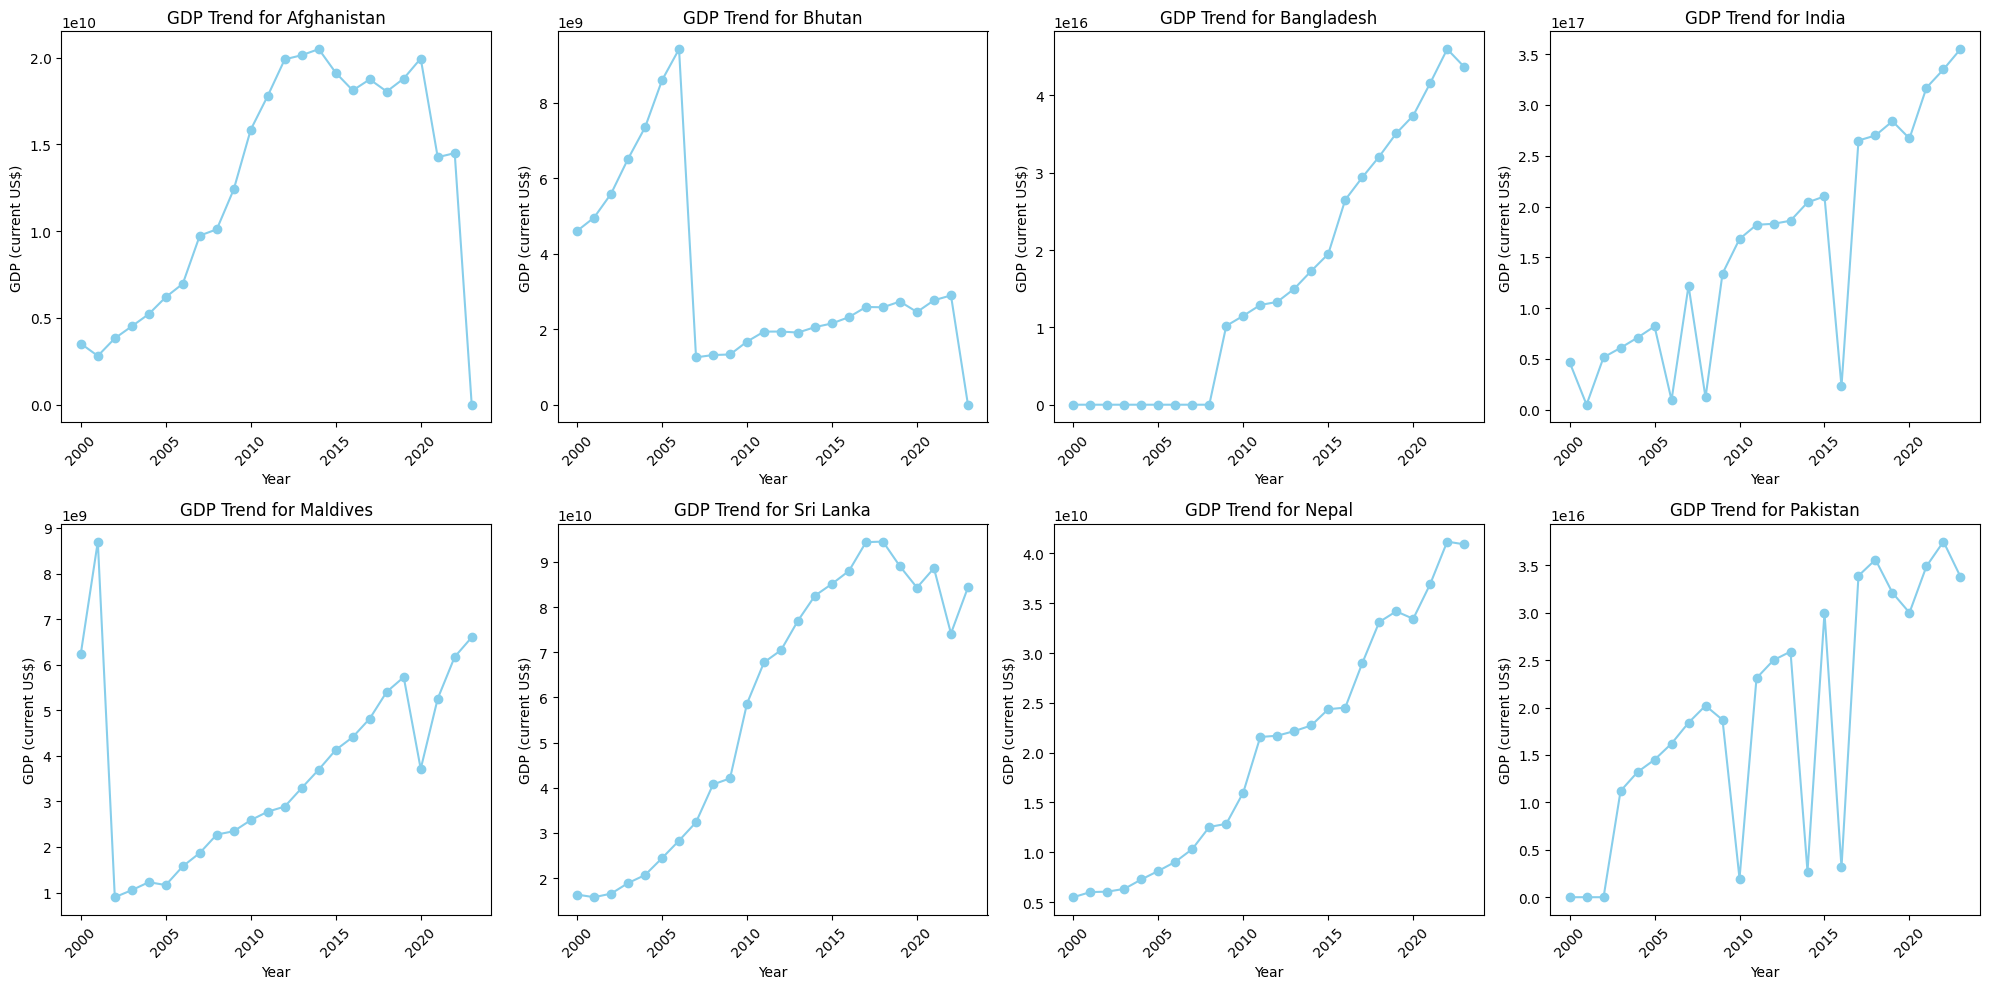

In [13]:
# List of countries to check GDP trends for
countries = data['Country'].unique()  # Get unique countries from the dataset

# Number of countries per row (4 countries per row)
countries_per_row = 4

# Calculate the number of rows needed
num_rows = math.ceil(len(countries) / countries_per_row)

# Create the figure and subplots
fig, axes = plt.subplots(num_rows, countries_per_row, figsize=(20, 5 * num_rows))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each country and plot GDP trend in the corresponding subplot
for i, country in enumerate(countries):
    country_data = data[data['Country'] == country]
    ax = axes[i]  # Select the axis for the current plot
    ax.plot(country_data['Year'], country_data['GDP (current US$)'], marker='o', color='skyblue')
    ax.set_title(f'GDP Trend for {country}')
    ax.set_xlabel('Year')
    ax.set_ylabel('GDP (current US$)')
    ax.tick_params(axis='x', rotation=45)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


This graph depict the GDP trends of eight South Asian countries over a period of time. While most countries exhibit varying degrees of economic growth, the rate and consistency of this growth differ significantly. Some countries, like Bangladesh and India, demonstrate strong and sustained economic expansion, while others like Afghanistan experience more volatile growth patterns. Factors such as government policies, political stability, natural resources, and global economic conditions likely influence these varying GDP trajectories.

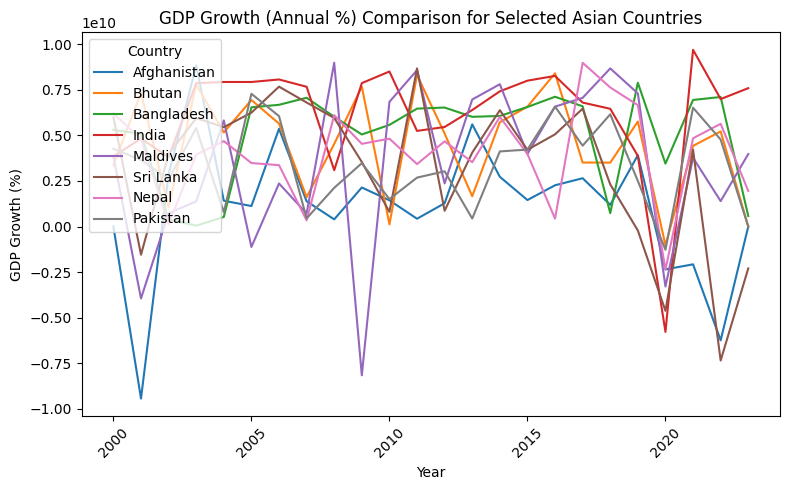

In [14]:
# List of countries to check GDP growth trends for
countries = data['Country'].unique()  # Get unique countries from the dataset

# Create the plot
plt.figure(figsize=(8, 5))

# Loop through each country and plot GDP growth trend
for country in countries:
    # Filter data for the current country inside the loop
    country_subset = data[data['Country'] == country]
    
    # Plot the GDP growth trend for the current country
    plt.plot(country_subset['Year'], country_subset['GDP growth (annual %)'], label=country)

# Title and labels
plt.title('GDP Growth (Annual %) Comparison for Selected Asian Countries')
plt.xlabel('Year')
plt.ylabel('GDP Growth (%)')
plt.legend(title='Country', loc='upper left')
plt.xticks(rotation=45)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()



The line graph illustrates the annual GDP growth rates of several Asian countries over a period spanning roughly two decades. It reveals significant fluctuations in growth rates across the countries, with no single overarching trend. Some nations, like India, demonstrate generally higher growth rates, while others, such as Pakistan, experience more volatile growth patterns with periods of rapid expansion followed by sharp contractions. These variations likely reflect the influence of various factors, including government policies, political stability, global economic conditions, and external shocks.

### Insights on Economic Growth and Development.

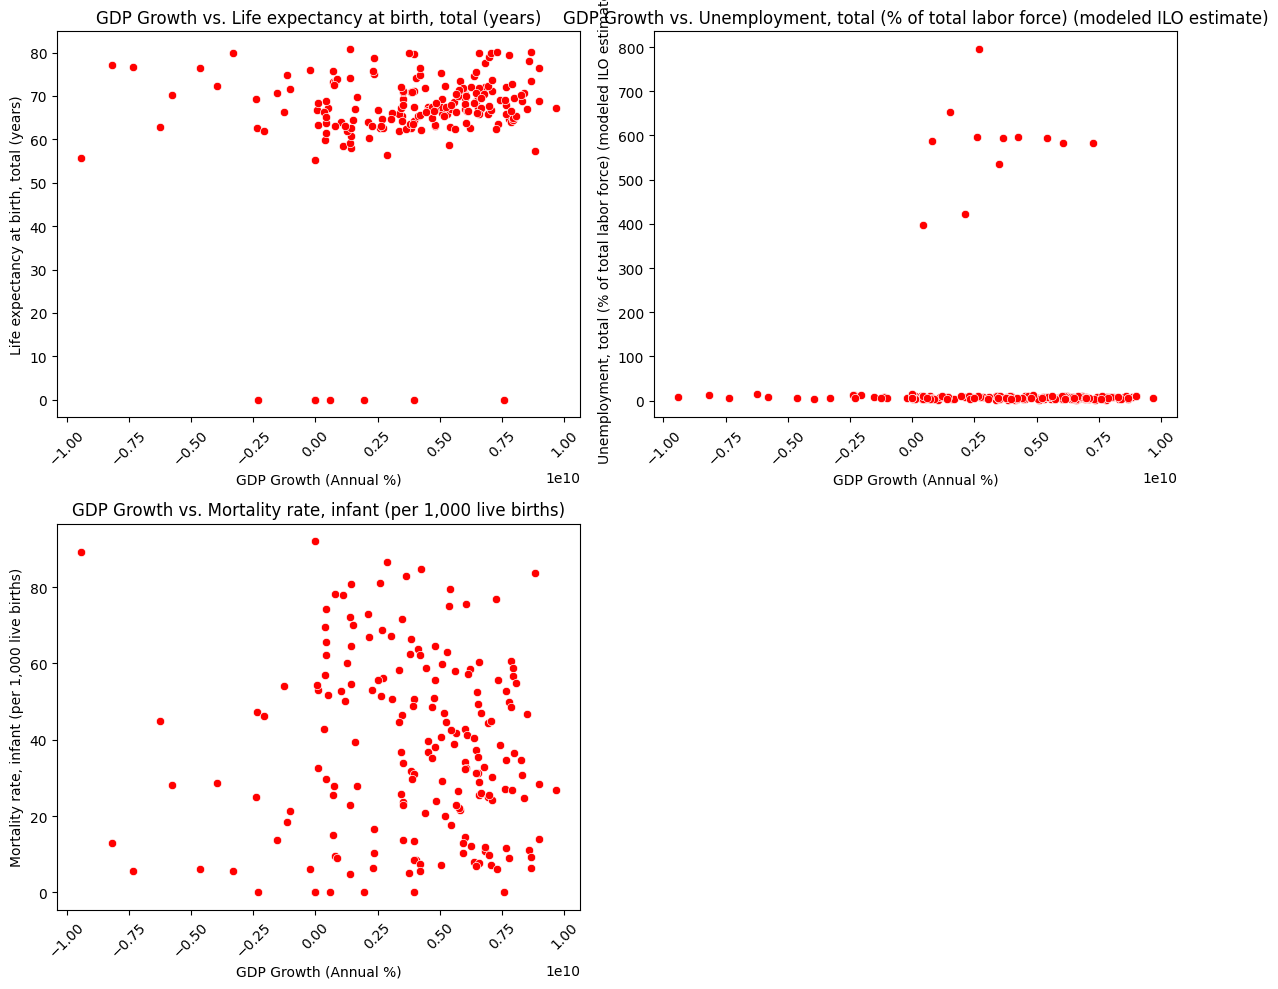

In [15]:
# List of factors to compare with GDP growth
factors = ['Life expectancy at birth, total (years)', 
           'Unemployment, total (% of total labor force) (modeled ILO estimate)', 
           'Mortality rate, infant (per 1,000 live births)']

# Create a figure for subplots
plt.figure(figsize=(12, 10))

# Loop through each factor and plot the scatter plot
for i, factor in enumerate(factors, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x='GDP growth (annual %)', y=factor, data=data, color='red')
    plt.title(f'GDP Growth vs. {factor}')
    plt.xlabel('GDP Growth (Annual %)')
    plt.ylabel(factor)
    plt.xticks(rotation=45)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()



1. **Life Expectancy at Birth:** This plot suggests a weak positive correlation between GDP Growth and Life Expectancy. As GDP Growth increases, there is a slight tendency for Life Expectancy to also increase. However, the relationship is not very strong, indicating that other factors besides GDP Growth play a significant role in determining life expectancy.

2. **Unemployment:** This plot shows a weak negative correlation between GDP Growth and Unemployment. As GDP Growth increases, there is a slight tendency for Unemployment to decrease. However, the relationship is not very strong, suggesting that other factors besides GDP Growth can influence unemployment rates.

3. **Infant Mortality Rate:** This plot suggests a weak negative correlation between GDP Growth and Infant Mortality Rate. As GDP Growth increases, there is a slight tendency for Infant Mortality Rate to decrease. However, the relationship is not very strong, indicating that other factors besides GDP Growth can influence infant mortality rates.

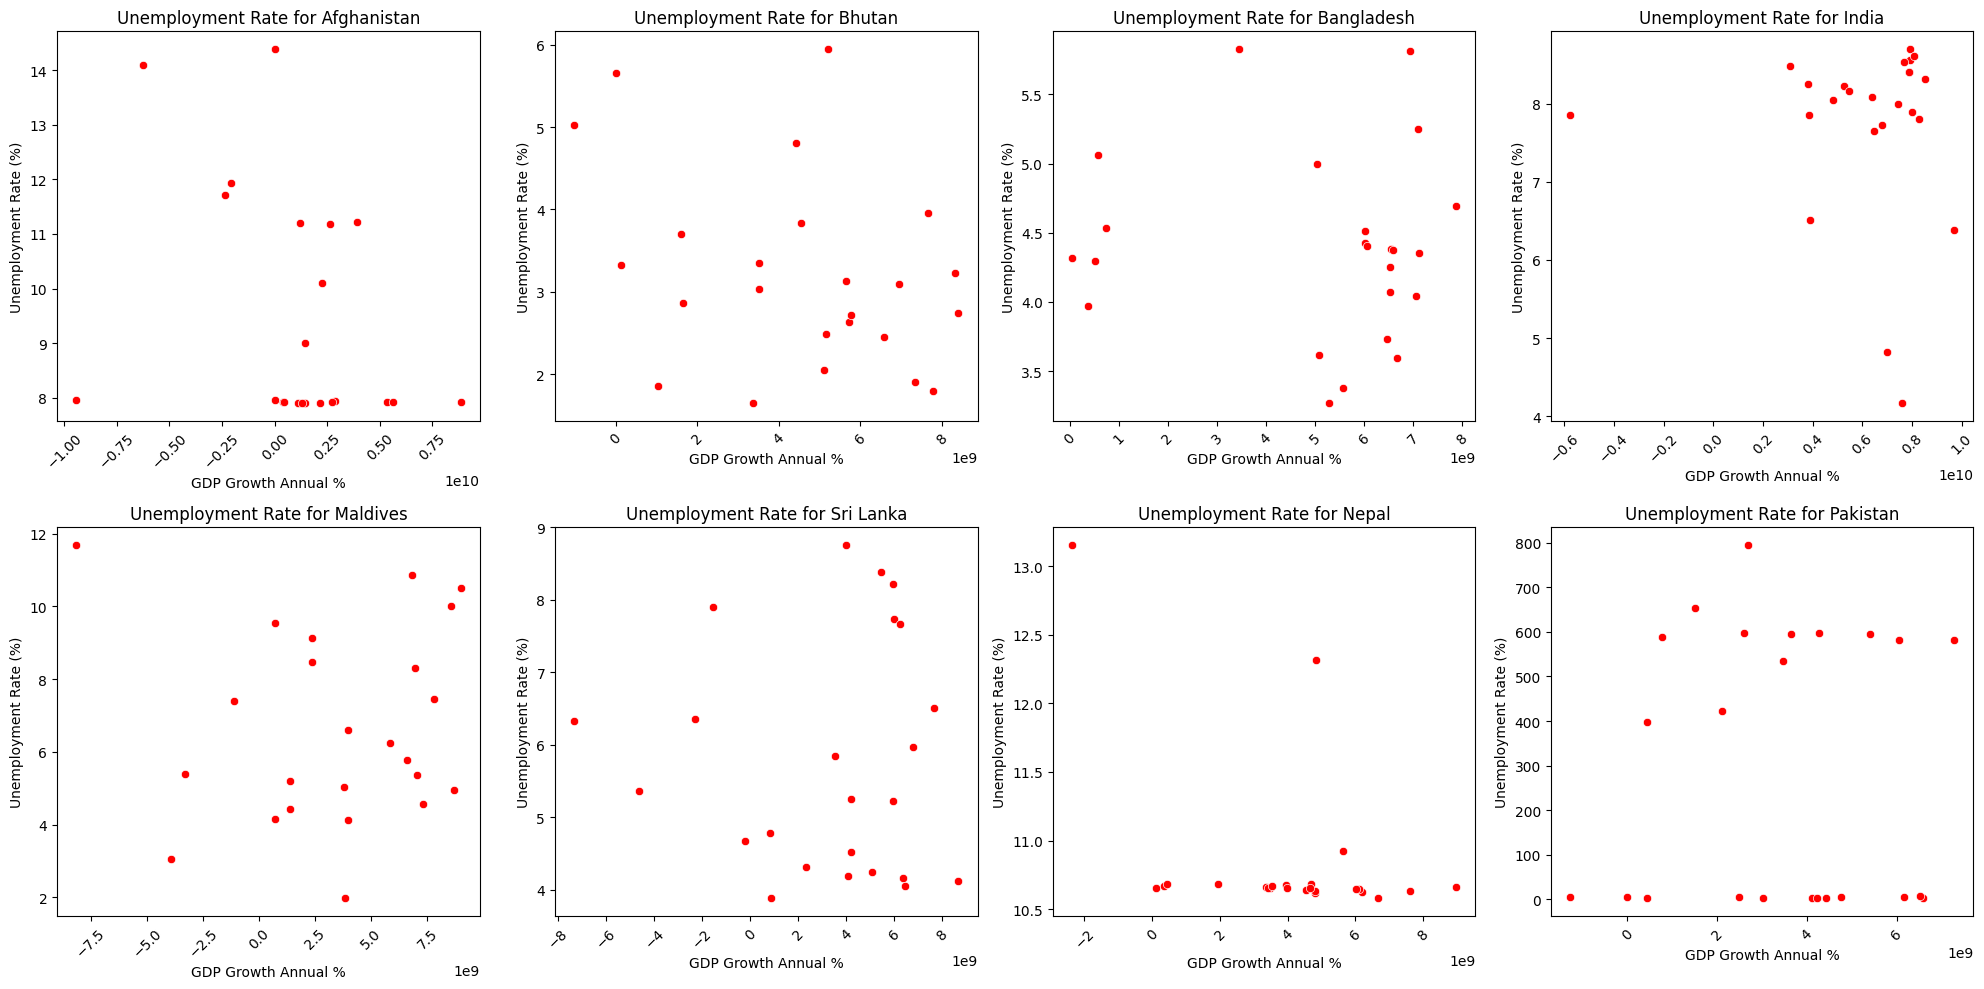

In [16]:
# List of countries to check Unemployment trends for
countries = data['Country'].unique()  # Get unique countries from the dataset

# Number of countries per row (4 countries per row)
countries_per_row = 4

# Calculate the number of rows needed
num_rows = math.ceil(len(countries) / countries_per_row)

# Create the figure and subplots
fig, axes = plt.subplots(num_rows, countries_per_row, figsize=(20, 5 * num_rows))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each country and plot Unemployment rate in the corresponding subplot
for i, country in enumerate(countries):
    country_data = data[data['Country'] == country]
    ax = axes[i]  # Select the axis for the current plot
    sns.scatterplot(x=country_data["GDP growth (annual %)"], 
                    y=country_data['Unemployment, total (% of total labor force) (modeled ILO estimate)'], 
                    ax=ax, color='Red')
    ax.set_title(f'Unemployment Rate for {country}')
    ax.set_xlabel('GDP Growth Annual %')
    ax.set_ylabel('Unemployment Rate (%)')
    ax.tick_params(axis='x', rotation=45)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()



The images present a series of scatter plots examining the relationship between GDP Growth (Annual %) and Unemployment Rate for eight South Asian countries: Afghanistan, Bhutan, Bangladesh, India, Maldives, Sri Lanka, Nepal, and Pakistan. While some plots hint at a weak negative correlation, suggesting that higher GDP growth might be associated with lower unemployment rates, this trend is not consistent across all countries. The relationship appears complex and varies significantly, implying that factors beyond GDP growth, such as labor force participation, education levels, and government policies, play a crucial role in determining unemployment rates in these nations.

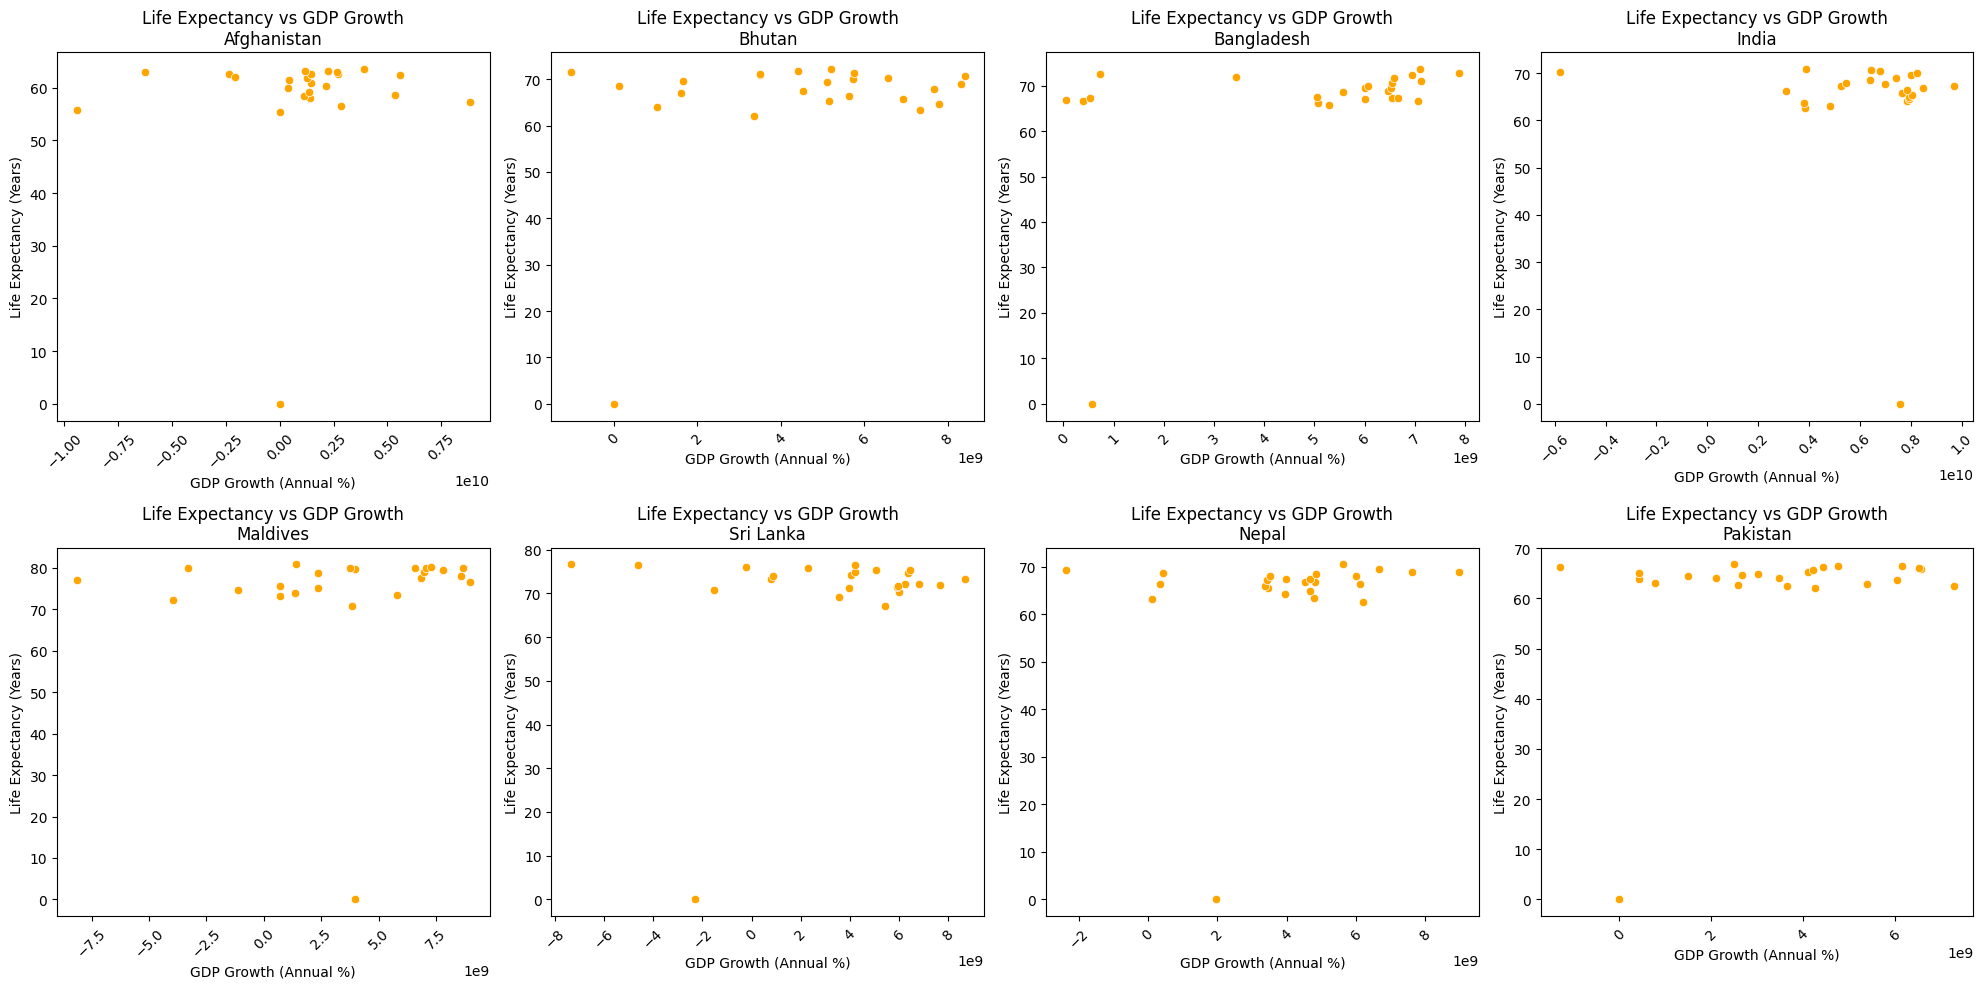

In [17]:
# List of countries to check data for
countries = data['Country'].unique()  # Get unique countries from the dataset

# Number of countries per row (4 countries per row)
countries_per_row = 4

# Calculate the number of rows needed
num_rows = math.ceil(len(countries) / countries_per_row)

# Create the figure and subplots
fig, axes = plt.subplots(num_rows, countries_per_row, figsize=(20, 5 * num_rows))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each country and plot the scatter plot for Life expectancy
for i, country in enumerate(countries):
    country_data = data[data['Country'] == country]
    ax = axes[i]  # Select the axis for the current plot
    sns.scatterplot(x='GDP growth (annual %)', 
                    y='Life expectancy at birth, total (years)', 
                    data=country_data, 
                    ax=ax, 
                    color='orange')
    ax.set_title(f'Life Expectancy vs GDP Growth\n{country}')
    ax.set_xlabel('GDP Growth (Annual %)')
    ax.set_ylabel('Life Expectancy (Years)')
    ax.tick_params(axis='x', rotation=45)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


The images present a series of scatter plots examining the relationship between GDP Growth (Annual %) and Life Expectancy at Birth for eight South Asian countries: Afghanistan, Bhutan, Bangladesh, India, Maldives, Sri Lanka, Nepal, and Pakistan. While some plots hint at a weak positive correlation, suggesting that higher GDP growth might be associated with slightly higher life expectancies, this trend is not consistent across all countries. The relationship appears to be complex and varies significantly, implying that factors beyond GDP growth, such as healthcare systems, access to education, and overall living standards, play a more crucial role in determining life expectancy in these nations.

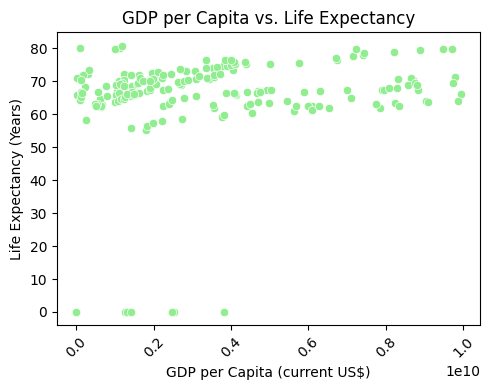

In [18]:
# Scatter plot to see the relationship between GDP per Capita and Life Expectancy
plt.figure(figsize=(5, 4))

# Plotting the relationship
sns.scatterplot(x='GDP per capita (current US$)', y='Life expectancy at birth, total (years)', data=data, color='lightgreen')

# Title and labels
plt.title('GDP per Capita vs. Life Expectancy')
plt.xlabel('GDP per Capita (current US$)')
plt.ylabel('Life Expectancy (Years)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


The scatter plot illustrates the relationship between GDP per capita and life expectancy. It reveals a general positive trend, suggesting that as GDP per capita increases, life expectancy tends to rise as well. 

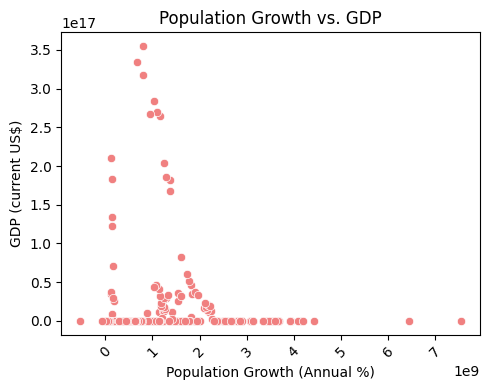

In [19]:
# Scatter plot to see the relationship between Population Growth and GDP
plt.figure(figsize=(5, 4))

# Plotting the relationship
sns.scatterplot(x='Population growth (annual %)', y='GDP (current US$)', data=data, color='lightcoral')

# Title and labels
plt.title('Population Growth vs. GDP')
plt.xlabel('Population Growth (Annual %)')
plt.ylabel('GDP (current US$)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


The scatter plot depicts the relationship between Population Growth (Annual %) and GDP (current US$). While a slight negative trend is observable, suggesting that higher population growth might be associated with lower GDP, the relationship is not strong or consistent. This indicates that other factors beyond population growth significantly influence a country's GDP, such as economic policies, resource availability, and technological advancements.

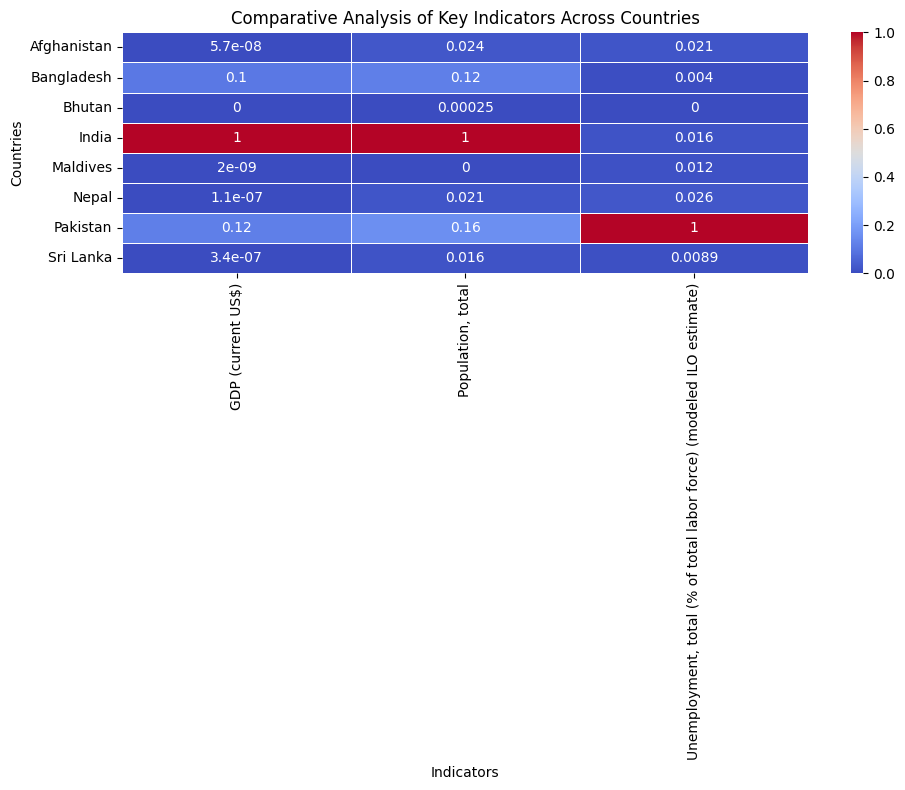

In [20]:
# Create a pivot table for comparison
pivot_data = data.pivot_table(index='Country', 
                              values=['GDP (current US$)', 'Population, total', 
                                      'Unemployment, total (% of total labor force) (modeled ILO estimate)'], 
                              aggfunc='mean').reset_index()

# Normalize the values for a heatmap
normalized_data = pivot_data.set_index('Country')
normalized_data = (normalized_data - normalized_data.min()) / (normalized_data.max() - normalized_data.min())

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(normalized_data, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Comparative Analysis of Key Indicators Across Countries')
plt.xlabel('Indicators')
plt.ylabel('Countries')
plt.tight_layout()
plt.show()





The image presents a heatmap depicting the relative values of key indicators (GDP, Population, and Unemployment) across eight South Asian countries. The color intensity represents the relative magnitude of each indicator for a given country, with darker shades indicating higher values. Notably, India stands out with the highest value for GDP, while Pakistan has the highest unemployment rate. This visualization provides a quick overview of the relative economic and social standing of these countries.

### Conclusion

The analysis of socio-economic indicators across South Asian countries highlights a stark contrast in development, with significant disparities in GDP, population growth, and life expectancy. While economic growth shows a positive correlation with life expectancy, this relationship is not universally strong, suggesting that other factors such as healthcare access, education, and government policies play pivotal roles. Countries like Bangladesh and India have demonstrated consistent economic growth, while nations like Afghanistan and Pakistan face more volatile trajectories, influenced by political stability and global factors.

The exploration of population growth reveals complex relationships with economic and health indicators, particularly in countries where rapid population increases strain resources, leading to higher unemployment and infant mortality. The negative correlation between GDP and GDP per capita further emphasizes the challenges large populations pose to per capita economic wealth.

Ultimately, the findings underscore the need for holistic and context-specific strategies. Policymakers must focus not only on boosting economic growth but also on addressing the underlying social factors—improving healthcare, managing population growth, and reducing unemployment—to ensure equitable development. Targeted interventions in countries with lower GDP per capita and higher infant mortality rates can help bridge the existing gaps, promoting long-term prosperity and well-being across the region.

### Insights

1. **GDP Growth Does Not Always Correlate with Improved Quality of Life**:  
   While higher GDP growth is often associated with better economic conditions, it does not always lead to improvements in life expectancy or unemployment rates. Some countries, particularly those with high economic growth, still struggle with issues like poor healthcare infrastructure and high unemployment rates. This suggests that economic growth must be accompanied by targeted investments in social sectors such as healthcare, education, and welfare.

2. **Socio-Economic Disparities Persist Despite Global Growth**:  
   The data highlights significant disparities in GDP, population, and life expectancy across countries. Many low-income nations continue to face challenges like high infant mortality and low life expectancy, even as their GDP grows. This points to the fact that economic progress alone is insufficient for addressing long-standing socio-economic disparities, especially in health and education.

3. **Population Growth Impacts Economic and Social Indicators**:  
   High population growth is linked to challenges in economic development, particularly in countries like India and Bangladesh. These nations face pressure on resources, increasing unemployment, and higher infant mortality rates. Managing population growth through family planning, improving healthcare, and creating jobs are crucial to ensuring that economic growth is sustainable and inclusive.

4. **Unemployment and Infant Mortality Are Interconnected**:  
   The relationship between high unemployment rates and high infant mortality indicates a cycle of socio-economic instability that affects a nation's human capital. Countries with higher unemployment tend to have higher infant mortality, suggesting that economic policies should focus not only on job creation but also on improving public health and social support systems to break this cycle.

5. **The Need for Regional Approaches to Development**:  
   Regional analysis reveals that socio-economic indicators differ significantly across countries and regions. For example, South Asian countries have unique challenges that may not be applicable in other parts of the world. A one-size-fits-all approach to development is ineffective; instead, regional strategies that account for local context, such as trade cooperation and healthcare improvements, are necessary to drive sustainable growth.

6. **Economic Diversification is Essential for Sustainable Growth**:  
   Countries heavily dependent on a few industries (e.g., oil or agriculture) risk facing economic instability. Diversifying economies through innovation, entrepreneurship, and investment in a broader range of industries, such as technology and manufacturing, can create more sustainable growth and reduce vulnerability to external shocks.

7. **Strong Governance is Key to Economic Stability**:  
   Political stability and good governance play a crucial role in ensuring that economic growth translates into improvements in quality of life. Countries like Afghanistan and Pakistan, which face volatile economic conditions, would benefit from more transparent policies, stronger governance, and enhanced infrastructure to foster a more stable and conducive environment for long-term development.

8. **Global Economic Growth is Uneven**:  
   The global growth narrative is complicated by significant differences in development outcomes across countries. While some countries have managed to use their economic growth to improve living standards, others remain mired in poverty and inequality. This suggests that global economic policies should aim to support underdeveloped nations with targeted assistance in areas like healthcare, education, and infrastructure.


### Recommendations

1. **Invest in Healthcare and Education**:  
   Countries with lower life expectancy but high GDP growth, such as Afghanistan, should prioritize improving healthcare infrastructure and expanding access to education. Focused investments in public health, maternal care, and vaccination programs can enhance life expectancy and contribute to human capital development.

2. **Promote Inclusive Economic Growth**:  
   There is a clear indication that economic growth alone does not guarantee improvements in quality of life, as seen in the relationship between GDP and life expectancy. Policymakers should implement policies that ensure the benefits of economic growth are broadly distributed. This includes promoting inclusive economic policies, expanding social safety nets, and targeting poverty reduction programs to vulnerable populations.

3. **Address Population Growth Challenges**:  
   Countries with high population growth, such as India and Bangladesh, may face challenges related to resource strain, unemployment, and infant mortality. Sustainable development policies should focus on managing population growth through family planning initiatives, improving maternal and child healthcare, and creating more employment opportunities, especially for youth.

4. **Focus on Unemployment Reduction**:  
   The correlation between high unemployment and higher infant mortality rates indicates a need for better job creation strategies. Governments should focus on creating more formal sector jobs, improving labor market participation, and enhancing vocational and technical education programs to equip young people with the skills necessary for employment.

5. **Strengthen Political Stability and Governance**:  
   Countries with volatile economic growth patterns, like Afghanistan and Pakistan, may benefit from enhanced political stability and stronger governance frameworks. Transparent policies, investment in infrastructure, and fostering a conducive environment for business can help attract both domestic and foreign investments, leading to more stable and sustained economic growth.

6. **Tailored Regional Strategies**:  
   Regional disparities in socio-economic indicators suggest that there is no one-size-fits-all approach to development. Tailored strategies that consider the unique challenges and opportunities in each country or region are crucial for achieving sustainable development. Regional cooperation, particularly in areas like trade, healthcare, and education, can help foster collective growth and mitigate disparities.

7. **Foster Economic Diversification**:  
   Several countries, especially those with a narrow economic base, should consider diversifying their economies to reduce dependency on one or a few sectors. This can be achieved through promoting innovation, fostering entrepreneurship, and investing in technology and infrastructure that supports a variety of industries.

8. **Improve Data Collection and Monitoring**:  
   Reliable and consistent data on key indicators like GDP, population growth, and life expectancy is critical for making informed decisions. Governments should invest in robust data collection systems and analytical tools to track progress, identify trends, and make necessary adjustments to policies as needed.

9. **Encourage Sustainable Practices**:  
   As countries experience rapid population growth and economic development, sustainable practices must be incorporated into development policies. This includes promoting green technologies, reducing carbon footprints, and encouraging resource-efficient industries to ensure that economic growth does not come at the expense of environmental degradation.
